In [7]:
!pip install tensorflow-hub

In [1]:
# Import modules
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
import keras.utils as image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.layers import GlobalAveragePooling2D

In [2]:
# Import modules
import tensorflow as tf
import tensorflow.keras as K


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

import numpy as np
import librosa.display, os
# import keras.utils as image
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

import tensorflow_hub as hub
import datetime
import matplotlib.pyplot as plt

In [3]:

from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [4]:
# !unzip "/content/drive/MyDrive/data_capstone/Spectrograms_training.zip" -d "/content/Spectrogram"

In [4]:
def load_images_from_path(path, label):
    images = []
    labels = []
    
    i = 0
    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
        # Logging images read
        i += 1
        if(i%500 == 0):
            print('Loaded',i,'images')
            
    print('\nTotal images = ',i)
    return images, labels

In [5]:
def show_images(images):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

In [6]:
# x and y store the images and labels respectively. Will be divided at a later stage into train and test samples. 
# Contain real and fake images
x = []
y = []

In [8]:
cd ..

E:\4th Year\Capstone


In [9]:
# Load real data
images, labels = load_images_from_path('spectrograms_training/training/real', 0)
    
x += images
y += labels

print('Image shape:',x[0].shape)
print('Image label (REAL):',y[0])

Loaded 500 images
Loaded 1000 images
Loaded 1500 images
Loaded 2000 images
Loaded 2500 images
Loaded 3000 images
Loaded 3500 images
Loaded 4000 images
Loaded 4500 images
Loaded 5000 images

Total images =  5104
Image shape: (224, 224, 3)
Image label (REAL): 0


In [10]:
# Load fake data
images, labels = load_images_from_path('spectrograms_training/training/fake', 1)
    
x += images
y += labels

print('Image shape:',x[0].shape)
print('Image label (FAKE):',y[-1])

Loaded 500 images
Loaded 1000 images
Loaded 1500 images
Loaded 2000 images
Loaded 2500 images
Loaded 3000 images
Loaded 3500 images
Loaded 4000 images
Loaded 4500 images
Loaded 5000 images

Total images =  5104
Image shape: (224, 224, 3)
Image label (FAKE): 1


In [11]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.25, random_state = 42)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

MemoryError: Unable to allocate 4.29 GiB for an array with shape (7656, 224, 224, 3) and data type float32

In [ ]:
# x_train_norm = np.array(x_train) 
# x_test_norm = np.array(x_test) 

In [18]:
print('Train image shape',x_train[0].shape, '\n', len(x_train_norm))  # replaced with x_train_norm
print('Train labels',y_train_encoded[0], '\n', y_train_encoded.shape)
print('Test image shape',x_test_norm[0].shape, '\n', len(x_test_norm))   # replaced with x_test_norm
print('Test labels',y_test_encoded[0:10], '\n', y_test_encoded.shape)

Train image shape (224, 224, 3) 
 7656
Train labels [0. 1.] 
 (7656, 2)
Test image shape (224, 224, 3) 
 2552
Test labels [[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]] 
 (2552, 2)


In [19]:
from tensorflow.keras.applications.mobilenet import MobileNet


In [20]:
base_model = MobileNet(weights='imagenet', include_top=False)


17235968/17225924 [==============================] - 3s 0us/step


In [24]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2, activation='sigmoid')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=x)


In [25]:
for layer in base_model.layers:
    layer.trainable = False


In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(x_train_norm, y_train_encoded, 
#           epochs= 5, 
#           batch_size= 32, 
#           validation_data=(x_test_norm, y_test_encoded))


Epoch 1/5
240/240 [==============================] - 266s 1s/step - loss: 0.3978 - accuracy: 0.8264 - val_loss: 0.3452 - val_accuracy: 0.8531
Epoch 2/5
240/240 [==============================] - 255s 1s/step - loss: 0.2907 - accuracy: 0.8819 - val_loss: 0.2904 - val_accuracy: 0.8789
Epoch 3/5
240/240 [==============================] - 240s 999ms/step - loss: 0.2504 - accuracy: 0.8993 - val_loss: 0.2673 - val_accuracy: 0.8903
Epoch 4/5
240/240 [==============================] - 242s 1s/step - loss: 0.2289 - accuracy: 0.9077 - val_loss: 0.2498 - val_accuracy: 0.8958
Epoch 5/5
240/240 [==============================] - 236s 986ms/step - loss: 0.2119 - accuracy: 0.9163 - val_loss: 0.2418 - val_accuracy: 0.9001


In [34]:
hist = model.fit(x_train_norm, y_train_encoded, 
          epochs= 5, 
          batch_size= 32, 
          validation_data=(x_test_norm, y_test_encoded))


Epoch 1/5
240/240 [==============================] - 257s 1s/step - loss: 0.1905 - accuracy: 0.9254 - val_loss: 0.2225 - val_accuracy: 0.9114
Epoch 2/5
240/240 [==============================] - 235s 981ms/step - loss: 0.1821 - accuracy: 0.9279 - val_loss: 0.2201 - val_accuracy: 0.9103
Epoch 3/5
240/240 [==============================] - 270s 1s/step - loss: 0.1743 - accuracy: 0.9344 - val_loss: 0.2267 - val_accuracy: 0.9107
Epoch 4/5
240/240 [==============================] - 276s 1s/step - loss: 0.1708 - accuracy: 0.9347 - val_loss: 0.2099 - val_accuracy: 0.9134
Epoch 5/5
240/240 [==============================] - 236s 985ms/step - loss: 0.1622 - accuracy: 0.9400 - val_loss: 0.2059 - val_accuracy: 0.9158


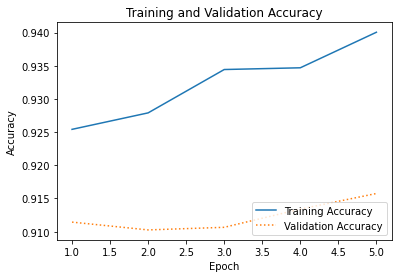

In [35]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.close()

In [32]:
y_preds = model.predict(x_test_norm)
print(y_preds, y_test_encoded)

[[0.03630432 0.94983673]
 [0.99859583 0.0010705 ]
 [0.3468932  0.58753234]
 ...
 [0.1472753  0.84926546]
 [0.07172155 0.9565029 ]
 [0.07711193 0.9158424 ]] [[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [115]:
import numpy as np

# Get the predicted class labels from y_preds
y_preds_classes = np.argmax(y_preds, axis=1)

# Get the true class labels from y_test_encoded
y_test_classes = np.argmax(y_test_encoded, axis=1)

# Print the true and predicted labels for the first 10 examples
print("True Labels\tPredicted Labels")
for i in range(20):
    print("{}\t\t{}".format(y_test_classes[i], y_preds_classes[i]))


True Labels	Predicted Labels
1		1
0		0
1		1
0		0
1		1
0		0
1		1
1		0
1		1
0		0
0		0
1		1
1		1
1		1
0		0
1		1
0		0
0		0
1		1
1		1


In [38]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_classes, y_preds_classes)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9028213166144201


In [39]:
!pip install lime

In [53]:
# View weights learnt by the model
model.save_weights('./checkpoints/my_checkpoint2')
model.save("D:/Atharva'/SEMESTER-8/Capstone/Capstone/saved_model/new_mobilenet")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When f

In [1]:
# Import necessary libraries
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_float

In [68]:
def predict_fn(index):
    # Get image from x_test using the index
    image = x_test[index]
    
    # Convert the image to double
    image = img_as_float(image)


    # Use your model to make a prediction
    prediction = model.predict(image)
    
    # Return the prediction
    return prediction

In [77]:
# # Choose an image to explain
# image_index = 0
# image = x_train[image_index]
# true_label = y_train[image_index]

## Use Lime to generate an explanation for the image
explanation = explainer.explain_instance(x_test_norm[0].astype('float64'), model.predict, hide_color=0, num_samples=1000)


# # Show the original image and the explanation
# temp, mask = explanation.get_image_and_mask(true_label, positive_only=False, num_features=10, hide_rest=False)
# plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
# plt.show()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 27.82it/s]


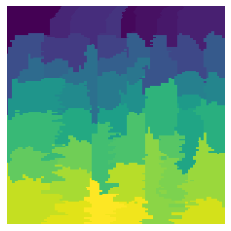

In [84]:
plt.imshow(explanation.segments)
plt.axis('off')
plt.show()

In [78]:
y_test_encoded[1]

array([1., 0.], dtype=float32)

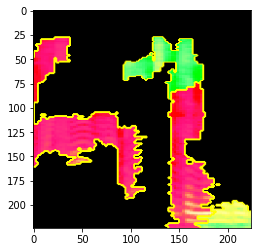

In [102]:
# Show the original image and the explanation
temp, mask = explanation.get_image_and_mask(np.argmax(y_test_encoded[0], axis=0), positive_only=False, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))
plt.show()

In [96]:
t = np.argmax(y_test_encoded[0])
t

1

In [104]:
len(y_test_encoded)

2552

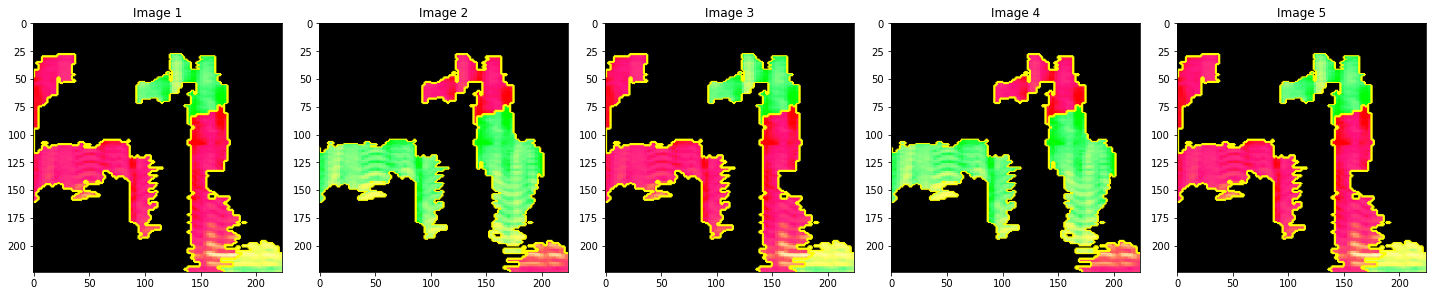

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))



for i, ax in enumerate(axes):
    # Show the original image and the explanation
    temp, mask = explanation.get_image_and_mask(np.argmax(y_test_encoded[i], axis=0), positive_only=False, num_features=10, hide_rest=True)
    ax.imshow(mark_boundaries(temp, mask))
    ax.set_title(f"Image {i+1}",y_test_classes)
    
plt.tight_layout()
plt.show()


In [110]:
for i in range(5):
    print(y_test_classes[i])

1
0
1
0
1


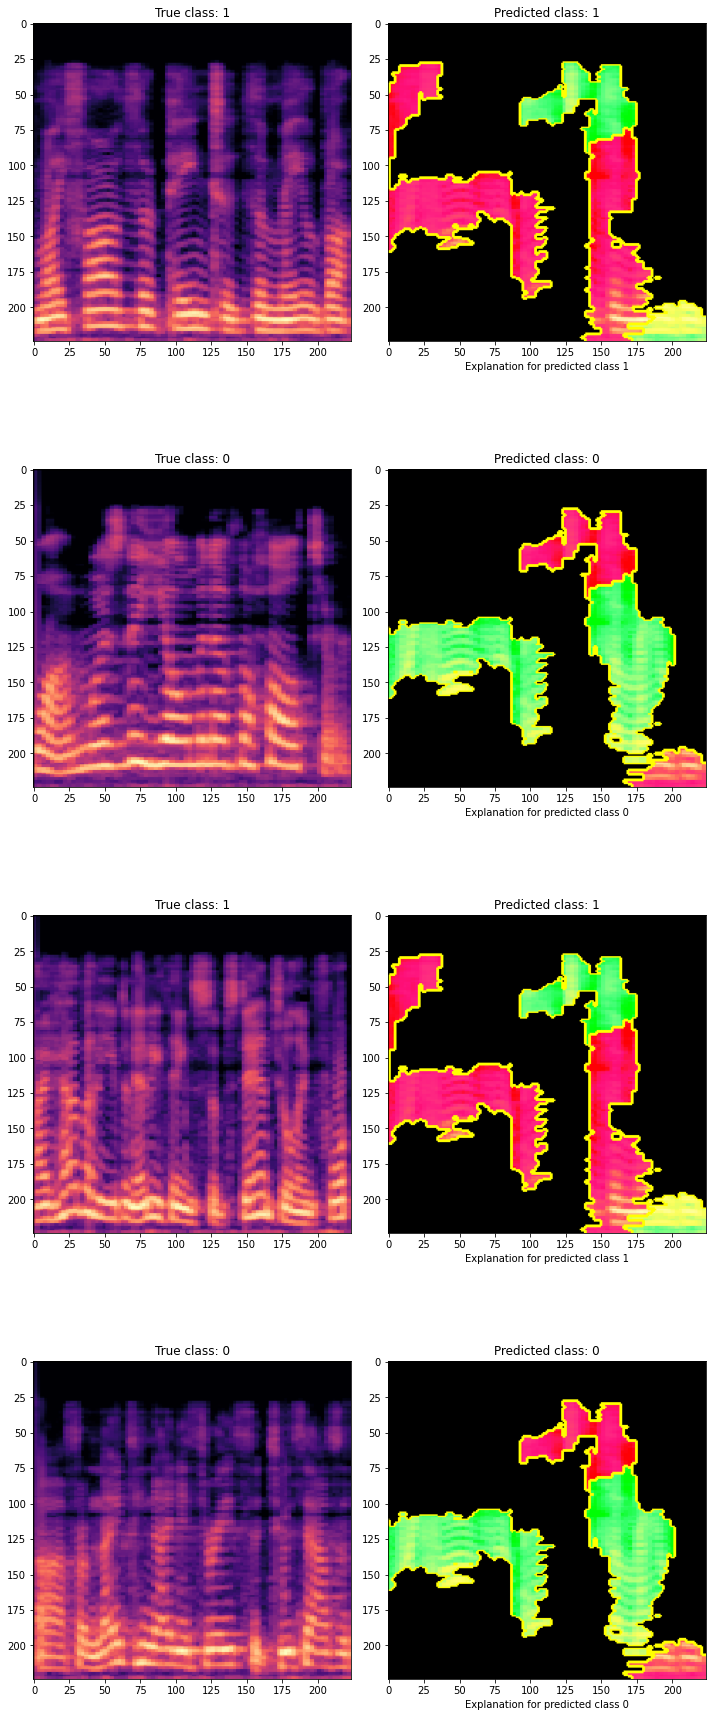

In [120]:
fig, axs = plt.subplots(4, 2, figsize=(10, 25))
for i in range(4):
    # Show the original image and the explanation
    temp, mask = explanation.get_image_and_mask(np.argmax(y_test_encoded[i], axis=0), positive_only=False, num_features=10, hide_rest=True)
    axs[i, 0].imshow(x_test_norm[i])
    axs[i, 0].set_title(f"True class: {np.argmax(y_test_encoded[i], axis=0)}")
    axs[i, 1].imshow(mark_boundaries(temp, mask))
    axs[i, 1].set_title(f"Predicted class: {model.predict(np.expand_dims(x_test_norm[i], axis=0)).argmax(axis=-1)[0]}")
    axs[i, 1].set_xlabel(f"Explanation for predicted class {model.predict(np.expand_dims(x_test_norm[i], axis=0)).argmax(axis=-1)[0]}")
plt.tight_layout()
plt.show()


In [118]:
import numpy as np

# Get the predicted labels for all the test images
y_pred = np.argmax(model.predict(x_test_norm), axis=1)

# Get the true labels for all the test images
y_true = np.argmax(y_test_encoded, axis=1)

# Get the indices of misclassified images
misclassified_indices = np.where(y_pred != y_true)[0]

print(misclassified_indices)


[  25   31   35   41   75  120  144  155  158  172  178  179  195  217
  253  255  290  292  303  305  316  320  331  341  358  387  388  390
  393  396  397  410  418  433  438  440  456  468  469  476  494  504
  522  533  537  552  561  592  602  635  638  662  664  691  692  696
  701  733  748  752  763  766  809  833  858  862  870  883  888  910
  928  929  938  946  958  976  978  983 1009 1057 1058 1079 1091 1095
 1102 1107 1153 1156 1162 1192 1204 1240 1243 1253 1255 1263 1268 1287
 1290 1293 1296 1309 1334 1369 1387 1400 1421 1436 1438 1449 1456 1459
 1462 1463 1489 1490 1501 1529 1532 1549 1595 1604 1613 1639 1649 1661
 1671 1675 1686 1697 1698 1701 1745 1749 1753 1762 1763 1792 1799 1831
 1832 1851 1911 1915 1916 1920 1922 1942 1952 1957 1975 1980 1982 1986
 1987 1992 1996 2023 2057 2061 2062 2078 2079 2102 2109 2121 2125 2128
 2148 2169 2171 2172 2173 2174 2176 2182 2188 2201 2218 2219 2222 2224
 2236 2244 2248 2249 2251 2258 2307 2330 2345 2351 2355 2361 2366 2375
 2397 

## Misclassified image lime output

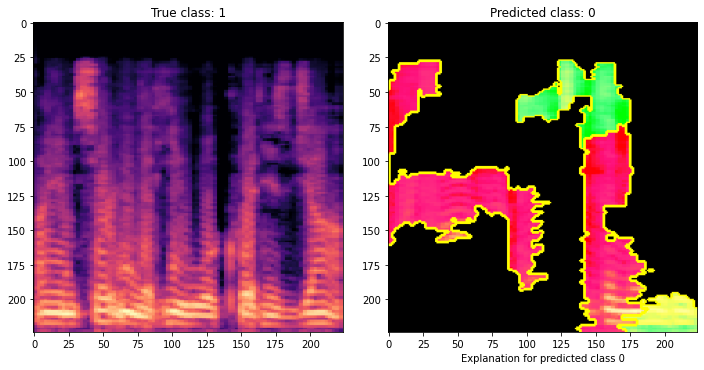

In [119]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
i = 25
# Show the original image and the explanation
temp, mask = explanation.get_image_and_mask(np.argmax(y_test_encoded[i], axis=0), positive_only=False, num_features=10, hide_rest=True)
axs[0].imshow(x_test_norm[i])
axs[0].set_title(f"True class: {np.argmax(y_test_encoded[i], axis=0)}")
axs[1].imshow(mark_boundaries(temp, mask))
axs[1].set_title(f"Predicted class: {model.predict(np.expand_dims(x_test_norm[i], axis=0)).argmax(axis=-1)[0]}")
axs[1].set_xlabel(f"Explanation for predicted class {model.predict(np.expand_dims(x_test_norm[i], axis=0)).argmax(axis=-1)[0]}")
plt.tight_layout()
plt.show()
